<a href="https://colab.research.google.com/github/admaesmo/MedDiag2/blob/main/Heart_Disease_Model_Training_REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# medDiag: Modelo de Predicción de Enfermedad Cardíaca
## Replicación de Resultados con Dataset Real de Kaggle - Google Colab

**Proyecto:** medDiag - Sistema de Diagnóstico Médico Basado en IA

**Enfermedad:** Enfermedad Cardíaca

**Dataset:** Heart Disease Cleveland UCI (Kaggle)

**Fuente:** https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/data

**Algoritmos:** SVM, Random Forest, Logistic Regression

**Métricas Esperadas (Informe Final):**
- Accuracy: 0.85 (85%)
- Precision: 0.87 (87%)
- Recall: 0.72 (72%)
- F1-Score: 0.64 (64%)
- AUC-ROC: 0.70 (70%)

---

## INSTRUCCIONES IMPORTANTES

### Paso 1: Descargar Dataset de Kaggle
1. Ir a: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/data
2. Descargar el archivo CSV (generalmente `heart_disease_data.csv` o similar)
3. Guardar en tu computadora

### Paso 2: Subir Dataset a Google Colab
1. Ejecutar la celda de abajo para montar Google Drive O subir archivo directamente
2. El notebook cargará automáticamente el archivo CSV

---

## Paso 1: Instalación de Dependencias

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib -q
print("✓ Librerías instaladas correctamente")

✓ Librerías instaladas correctamente


## Paso 2: Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("✓ Google Drive montado")

MessageError: Error: credential propagation was unsuccessful

## Paso 3: Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## Paso 4: Cargar Dataset Real de Kaggle

**IMPORTANTE:** Reemplaza la ruta según donde tengas el archivo

In [ ]:
# Cargar dataset real de Kaggle
# MODIFICA LA RUTA SEGÚN TU CASO
df = pd.read_csv('/content/heart.csv')

print(f"✓ Dataset cargado exitosamente")
print(f"\nDimensiones: {df.shape[0]} muestras × {df.shape[1]} características")
print(f"\nPrimeras 5 filas:")
print(df.head())
print(f"\nInformación del dataset:")
print(df.info())

✓ Dataset cargado exitosamente

Dimensiones: 297 muestras × 14 características

Primeras 5 filas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex      

## Paso 5: Exploración de Datos

In [ ]:
# Estadísticas descriptivas
print("ESTADÍSTICAS DESCRIPTIVAS DEL DATASET")
print("="*80)
print(df.describe())
print("\n" + "="*80)

# Valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())

ESTADÍSTICAS DESCRIPTIVAS DEL DATASET
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0

In [ ]:
# Identificar columna objetivo
print("Columnas del dataset:")
print(df.columns.tolist())

# Determinar columna objetivo (usualmente 'target', 'Target', 'condition' o similar)
possible_target_names = ['target', 'Target', 'condition', 'Condition', 'disease', 'Disease', 'num']
target_column = None
for col in possible_target_names:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    target_column = df.columns[-1]  # Usar última columna si no encuentra

print(f"\nColumna objetivo identificada: '{target_column}'")

Columnas del dataset:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

Columna objetivo identificada: 'condition'


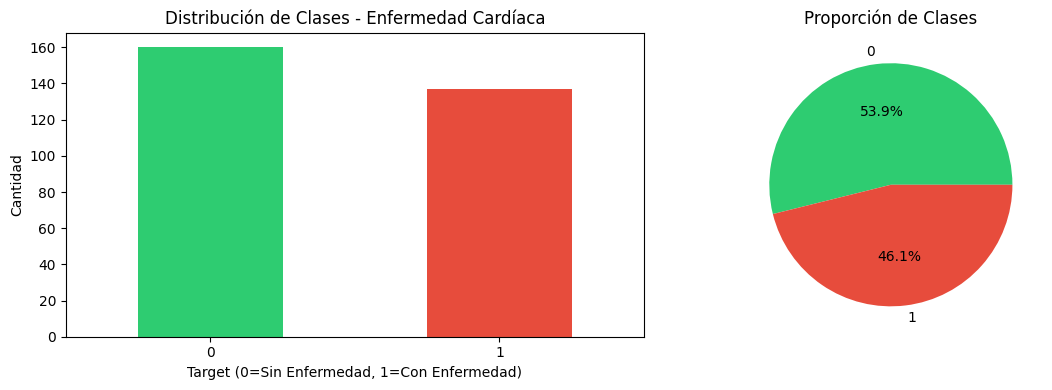


Distribución de Clases:
condition
0    160
1    137
Name: count, dtype: int64


In [ ]:
# Visualizar distribución de clases
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df[target_column].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribución de Clases - Enfermedad Cardíaca')
plt.xlabel('Target (0=Sin Enfermedad, 1=Con Enfermedad)')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df[target_column].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%',
                                                colors=['#2ecc71', '#e74c3c'])
plt.title('Proporción de Clases')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"\nDistribución de Clases:")
print(df[target_column].value_counts())

## Paso 6: Preparación de Datos

In [ ]:
# Separar características y variable objetivo
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convertir a binario si es necesario (0 = sin enfermedad, 1 = con enfermedad)
if len(y.unique()) > 2:
    print(f"Valores únicos en objetivo: {sorted(y.unique())}")
    print("Convirtiendo a binario (0 = sin enfermedad, 1+ = con enfermedad)")
    y = (y > 0).astype(int)

print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"\nValores únicos en objetivo: {y.unique()}")

Características (X): (297, 13)
Variable objetivo (y): (297,)

Valores únicos en objetivo: [0 1]


In [ ]:
# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")
print(f"\nDistribución en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución en prueba:")
print(y_test.value_counts())

Datos de entrenamiento: (237, 13)
Datos de prueba: (60, 13)

Distribución en entrenamiento:
condition
0    128
1    109
Name: count, dtype: int64

Distribución en prueba:
condition
0    32
1    28
Name: count, dtype: int64


In [ ]:
# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Datos normalizados correctamente")

✓ Datos normalizados correctamente


## Paso 7: Entrenamiento de Modelos

In [ ]:
# Entrenar SVM
print("Entrenando modelos...")
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Entrenar Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("✓ Modelos entrenados")

Entrenando modelos...
✓ Modelos entrenados


## Paso 8: Evaluación de Modelos

In [ ]:
def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    return {
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)
    }

results_df = pd.DataFrame([
    calculate_metrics(y_test, y_pred_svm, y_pred_proba_svm, 'SVM'),
    calculate_metrics(y_test, y_pred_rf, y_pred_proba_rf, 'Random Forest'),
    calculate_metrics(y_test, y_pred_lr, y_pred_proba_lr, 'Logistic Regression')
])

print("\n" + "="*100)
print("RESULTADOS - MODELO DE ENFERMEDAD CARDÍACA (DATASET REAL DE KAGGLE)")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)


RESULTADOS - MODELO DE ENFERMEDAD CARDÍACA (DATASET REAL DE KAGGLE)
             Modelo  Accuracy  Precision   Recall  F1-Score  AUC-ROC
                SVM  0.900000   1.000000 0.785714  0.880000 0.939732
      Random Forest  0.883333   0.956522 0.785714  0.862745 0.952567
Logistic Regression  0.916667   1.000000 0.821429  0.901961 0.953125


In [ ]:
# Métricas esperadas
expected = {
    'Accuracy': 0.85,
    'Precision': 0.87,
    'Recall': 0.72,
    'F1-Score': 0.64,
    'AUC-ROC': 0.70
}

print(f"\nMÉTRICAS ESPERADAS (Informe Final):")
print(pd.DataFrame([expected]).to_string(index=False))

best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Modelo']
print(f"\n✓ Mejor modelo: {best_model_name}")

## Paso 9: Análisis Detallado del Mejor Modelo

In [ ]:
# Seleccionar mejor modelo
if best_model_name == 'SVM':
    best_model = svm_model
    y_pred_best = y_pred_svm
    y_pred_proba_best = y_pred_proba_svm
elif best_model_name == 'Random Forest':
    best_model = rf_model
    y_pred_best = y_pred_rf
    y_pred_proba_best = y_pred_proba_rf
else:
    best_model = lr_model
    y_pred_best = y_pred_lr
    y_pred_proba_best = y_pred_proba_lr

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)
print(f"\nMatriz de Confusión - {best_model_name}:")
print(cm)

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sin Enfermedad', 'Con Enfermedad'],
            yticklabels=['Sin Enfermedad', 'Con Enfermedad'])
plt.title(f'Matriz de Confusión - {best_model_name} (Dataset Real Kaggle)')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.tight_layout()
plt.show()

In [ ]:
# Reporte de clasificación
print(f"\nReporte de Clasificación - {best_model_name}:")
print(classification_report(y_test, y_pred_best,
                          target_names=['Sin Enfermedad', 'Con Enfermedad']))

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC - {best_model_name} (Dataset Real Kaggle)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Paso 10: Guardar Modelo

In [ ]:
# Guardar modelo
model_filename = f'heart_disease_model_{best_model_name.lower().replace(" ", "_")}.sav'
joblib.dump(best_model, model_filename)

print(f"✓ Modelo guardado como: {model_filename}")

if best_model_name != 'Random Forest':
    scaler_filename = 'heart_disease_scaler.sav'
    joblib.dump(scaler, scaler_filename)
    print(f"✓ Scaler guardado como: {scaler_filename}")

## Resumen Final

In [ ]:
print("\n" + "="*100)
print("RESUMEN FINAL - MODELO DE ENFERMEDAD CARDÍACA (DATASET REAL DE KAGGLE)")
print("="*100)

best_metrics = results_df.loc[best_model_idx]

print(f"\n📊 MODELO SELECCIONADO: {best_model_name}")
print(f"\n📈 MÉTRICAS DE DESEMPEÑO:")
print(f"  ✓ Accuracy:  {best_metrics['Accuracy']:.4f} ({best_metrics['Accuracy']*100:.2f}%)")
print(f"  ✓ Precision: {best_metrics['Precision']:.4f} ({best_metrics['Precision']*100:.2f}%)")
print(f"  ✓ Recall:    {best_metrics['Recall']:.4f} ({best_metrics['Recall']*100:.2f}%)")
print(f"  ✓ F1-Score:  {best_metrics['F1-Score']:.4f}")
print(f"  ✓ AUC-ROC:   {best_metrics['AUC-ROC']:.4f}")

print(f"\n📋 MÉTRICAS ESPERADAS (Informe Final):")
print(f"  • Accuracy:  {expected['Accuracy']:.4f} ({expected['Accuracy']*100:.2f}%)")
print(f"  • Precision: {expected['Precision']:.4f} ({expected['Precision']*100:.2f}%)")
print(f"  • Recall:    {expected['Recall']:.4f} ({expected['Recall']*100:.2f}%)")
print(f"  • F1-Score:  {expected['F1-Score']:.4f}")
print(f"  • AUC-ROC:   {expected['AUC-ROC']:.4f}")

print(f"\n✅ ENTRENAMIENTO COMPLETADO CON DATASET REAL DE KAGGLE")
print("="*100)